# Importation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels
import time
import scipy.stats as st
import statsmodels.formula.api
import statsmodels.api
from numpy.random import randn
from numpy.random import seed
from scipy.stats import spearmanr
from scipy import stats
warnings.filterwarnings('ignore')

# Lecture des 3 fichiers excel

In [2]:
customers=pd.read_csv("customers.csv")
products=pd.read_csv("products.csv")
transactions=pd.read_csv("transactions.csv")

In [3]:
#Option d'affichage à 100 lignes max
pd.set_option('display.max_rows', 100)

# Cleaning des données

# Affichage de customers

In [4]:
#Affichage des 8623 clients et leurs informations
customers

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968


In [5]:
#Type des données de customers
customers.dtypes

client_id    object
sex          object
birth         int64
dtype: object

In [6]:
#Liste des valeurs possible de sex
list(customers.sex.unique())

['f', 'm']

In [7]:
#Somme des valeurs nulles de birth
customers["birth"].isnull().sum()

0

In [8]:
#Analyse des valeurs de birth
customers.describe()

,birth
count,8623.000000
mean,1978.280877
std,16.919535
min,1929.000000
25%,1966.000000
50%,1979.000000
75%,1992.000000
max,2004.000000


In [9]:
#Somme des valeurs nulles de client_id
customers["client_id"].isnull().sum()

0

In [10]:
#Unicité de client_id
customers["client_id"].is_unique

True

# Affichage de products

In [11]:
#Affichage des 3287 produits et leurs informations
products

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


In [12]:
#Type de données des products
products.dtypes

id_prod     object
price      float64
categ        int64
dtype: object

In [13]:
#Liste des valeurs possible de categ
list(products.categ.unique())

[0, 1, 2]

In [14]:
#Analyse des valeurs de price
products.price.describe()

count    3287.000000
mean       21.856641
std        29.847908
min        -1.000000
25%         6.990000
50%        13.060000
75%        22.990000
max       300.000000
Name: price, dtype: float64

In [15]:
#Affichage des products pour prix=-1
products.loc[products.price==-1]

,id_prod,price,categ
731,T_0,-1.0,0


In [16]:
#Affichage des transactions pour id_prod=T_0
transactions.loc[transactions.id_prod=="T_0"]

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


In [17]:
#Affichage des customers pour client_id=ct_1
customers.loc[customers.client_id=="ct_1"]

,client_id,sex,birth
8494,ct_1,m,2001


In [18]:
#Affichage des customers pour client_id=ct_0
customers.loc[customers.client_id=="ct_0"]

,client_id,sex,birth
2735,ct_0,f,2001


In [19]:
#Affichage des doublons de dates
datesdoublons=transactions.loc[transactions.date.duplicated()]
datesdoublons

,id_prod,date,session_id,client_id
23678,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_1
27778,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
52424,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
82253,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
92684,T_0,test_2021-03-01 02:30:02.237444,s_0,ct_1
...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


In [20]:
list(datesdoublons.id_prod.unique())

['T_0']

In [21]:
#On retire les transactions tests vus plus haut 
transactions = transactions[(transactions["client_id"] != 'ct_1') & (transactions["client_id"] != 'ct_0')]
customers = customers[(customers["client_id"] != 'ct_1') & (customers["client_id"] != 'ct_0')]

In [22]:
#Somme des valeurs nulles de price
products["price"].isnull().sum()

0

In [23]:
#Unicité de id_prod
products["id_prod"].is_unique

True

In [24]:
#Somme des valeurs nulles de id_prod
products["id_prod"].isnull().sum()

0

# Affichage de transactions

In [25]:
#Affichage de transactions
transactions

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


In [26]:
#Type des données de transactions
transactions.dtypes

id_prod       object
date          object
session_id    object
client_id     object
dtype: object

In [27]:
#Affichage de transactions pour session_id=s_158752 afin de voir a quoi il correspond
transactions.loc[transactions.session_id=="s_158752"]

,id_prod,date,session_id,client_id
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
292769,0_1356,2022-02-02 08:43:30.556475,s_158752,c_8534
364277,0_2218,2022-02-02 07:56:59.745175,s_158752,c_8534
486446,0_1646,2022-02-02 08:34:21.645835,s_158752,c_8534


In [28]:
#Affichage de transactions pour session_id=s_325227 afin de voir a quoi il correspond
transactions.loc[transactions.session_id=="s_325227"]

,id_prod,date,session_id,client_id
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
187463,0_1412,2023-01-11 08:51:55.515020,s_325227,c_4232
404411,0_1380,2023-01-11 08:25:51.777869,s_325227,c_4232
530937,1_653,2023-01-11 08:11:12.250882,s_325227,c_4232


In [29]:
#On en déduit que session_id correspond à l'ajout par un client d'un produit dans le panier

In [30]:
#Changement du type de date
transactions['date'] = pd.to_datetime(transactions.date, format='%Y-%m-%d %H:%M:%S', errors = 'coerce')

In [31]:
#Somme des valeurs manquantes des colonnes de transactions
transactions["id_prod"].isnull().sum(),transactions["client_id"].isnull().sum(),transactions["session_id"].isnull()\
.sum()

(0, 0, 0)

# Jointure entre les 3 fichiers

In [32]:
#Première outer liaison entre customers et transactions sur client_id
customersliaison_df = pd.merge(customers, transactions, how="outer", on="client_id", indicator=True)

In [33]:
#Affichage de customersliaison_df
customersliaison_df

,client_id,sex,birth,id_prod,date,session_id,_merge
0,c_4410,f,1967,0_1316,2021-12-29 09:11:18.860592,s_141762,both
1,c_4410,f,1967,1_385,2021-03-22 01:40:22.782925,s_9707,both
2,c_4410,f,1967,1_190,2021-11-12 18:11:43.280574,s_118628,both
3,c_4410,f,1967,0_1455,2021-03-22 14:29:25.189266,s_9942,both
4,c_4410,f,1967,1_483,2022-03-13 21:35:55.949042,s_178686,both
...,...,...,...,...,...,...,...
679348,c_84,f,1982,0_1438,2022-05-29 06:11:50.316631,s_215697,both
679349,c_84,f,1982,0_1020,2021-10-21 03:52:13.863959,s_107849,both
679350,c_84,f,1982,0_1399,2021-10-01 16:13:18.997813,s_98493,both
679351,c_84,f,1982,0_1417,2021-03-13 23:55:06.835238,s_5960,both


In [34]:
#Correspondance à droite et vice versa
list(customersliaison_df._merge.unique())

['both', 'left_only']

In [35]:
#Valeurs de weberpliaison_df lorsque merge=letf_only
customersliaison_df.loc[customersliaison_df._merge=="left_only"]

,client_id,sex,birth,id_prod,date,session_id,_merge
59493,c_8253,f,2001,NaN,NaT,NaN,left_only
200286,c_3789,f,1997,NaN,NaT,NaN,left_only
218173,c_4406,f,1998,NaN,NaT,NaN,left_only
220388,c_2706,f,1967,NaN,NaT,NaN,left_only
225538,c_3443,m,1959,NaN,NaT,NaN,left_only
248409,c_4447,m,1956,NaN,NaT,NaN,left_only
248965,c_3017,f,1992,NaN,NaT,NaN,left_only
261024,c_4086,f,1992,NaN,NaT,NaN,left_only
313133,c_6930,m,2004,NaN,NaT,NaN,left_only
319727,c_4358,m,1999,NaN,NaT,NaN,left_only


In [36]:
#Longueur de la dataframe
len(customersliaison_df.loc[customersliaison_df._merge=="left_only"])

21

In [37]:
#Création de la dataframe customersliaisonboth
customersliaisonboth=customersliaison_df.loc[customersliaison_df._merge=="both"]
customersliaisonboth

,client_id,sex,birth,id_prod,date,session_id,_merge
0,c_4410,f,1967,0_1316,2021-12-29 09:11:18.860592,s_141762,both
1,c_4410,f,1967,1_385,2021-03-22 01:40:22.782925,s_9707,both
2,c_4410,f,1967,1_190,2021-11-12 18:11:43.280574,s_118628,both
3,c_4410,f,1967,0_1455,2021-03-22 14:29:25.189266,s_9942,both
4,c_4410,f,1967,1_483,2022-03-13 21:35:55.949042,s_178686,both
...,...,...,...,...,...,...,...
679348,c_84,f,1982,0_1438,2022-05-29 06:11:50.316631,s_215697,both
679349,c_84,f,1982,0_1020,2021-10-21 03:52:13.863959,s_107849,both
679350,c_84,f,1982,0_1399,2021-10-01 16:13:18.997813,s_98493,both
679351,c_84,f,1982,0_1417,2021-03-13 23:55:06.835238,s_5960,both


In [38]:
#Jointure entre customersliaisonboth et products
customersliaisonboth = customersliaisonboth.drop(columns="_merge")
liaison_df = pd.merge(customersliaisonboth, products, how="outer", on="id_prod", indicator=True)
liaison_df

,client_id,sex,birth,id_prod,date,session_id,price,categ,_merge
0,c_4410,f,1967.0,0_1316,2021-12-29 09:11:18.860592,s_141762,7.20,0.0,both
1,c_4410,f,1967.0,0_1316,2022-03-29 09:11:18.860592,s_186233,7.20,0.0,both
2,c_4410,f,1967.0,0_1316,2022-05-29 09:11:18.860592,s_215758,7.20,0.0,both
3,c_3654,f,1978.0,0_1316,2021-11-26 03:51:34.068872,s_125143,7.20,0.0,both
4,c_3654,f,1978.0,0_1316,2022-08-26 03:51:34.068872,s_258546,7.20,0.0,both
...,...,...,...,...,...,...,...,...,...
679349,NaN,NaN,NaN,0_1624,NaT,NaN,24.50,0.0,right_only
679350,NaN,NaN,NaN,2_86,NaT,NaN,132.36,2.0,right_only
679351,NaN,NaN,NaN,0_299,NaT,NaN,22.99,0.0,right_only
679352,NaN,NaN,NaN,0_510,NaT,NaN,23.66,0.0,right_only


In [39]:
#Correspondance à droite et vice versa
list(liaison_df._merge.unique())

['both', 'left_only', 'right_only']

In [40]:
#Valeurs de liaison_df lorsque merge=letf_only
liaison_dfleft=liaison_df.loc[liaison_df._merge=="left_only"]
liaison_dfleft=liaison_dfleft.drop(columns="_merge")
liaison_dfleft

,client_id,sex,birth,id_prod,date,session_id,price,categ
542051,c_4505,m,1976.0,0_2245,2022-01-09 09:23:31.000720,s_147220,NaN,NaN
542052,c_4505,m,1976.0,0_2245,2022-11-09 09:23:31.000720,s_295013,NaN,NaN
542053,c_3468,f,1981.0,0_2245,2021-09-11 10:52:05.205583,s_88251,NaN,NaN
542054,c_3468,f,1981.0,0_2245,2022-05-11 10:52:05.205583,s_206902,NaN,NaN
542055,c_1403,f,1978.0,0_2245,2022-09-15 14:26:50.187952,s_268455,NaN,NaN
...,...,...,...,...,...,...,...,...
542267,c_4283,f,1976.0,0_2245,2022-08-01 02:46:38.931757,s_246657,NaN,NaN
542268,c_4283,f,1976.0,0_2245,2021-09-01 02:46:38.931757,s_83377,NaN,NaN
542269,c_6236,f,1976.0,0_2245,2022-02-25 00:08:08.736068,s_170426,NaN,NaN
542270,c_4453,m,1981.0,0_2245,2022-02-16 11:35:20.319501,s_166050,NaN,NaN


In [41]:
#Liste des id_prod pour lesquels merge=left_only
list(liaison_df.loc[liaison_df._merge=="left_only"].id_prod.unique())

['0_2245']

In [42]:
#Avec les informations qu'on possède on peut faire une imputation de prix pour ce produit en remplaçant les valeurs
#nan par la médiane des prix de catégorie 0
#Analyse des valeurs de price
categ0=liaison_df.loc[liaison_df.categ==0]
categ0.describe()

,birth,price,categ
count,415459.000000,415476.000000,415476.0
mean,1978.102554,10.638302,0.0
std,11.209687,4.934009,0.0
min,1929.000000,-1.000000,0.0
25%,1973.000000,6.290000,0.0
50%,1980.000000,9.990000,0.0
75%,1986.000000,14.450000,0.0
max,2004.000000,40.990000,0.0


In [43]:
#Affichage des valeurs de left_only pour lesquels le prix est nul
liaison_dfleft_price=liaison_dfleft.loc[liaison_dfleft.price.isna()]
liaison_dfleft_price

,client_id,sex,birth,id_prod,date,session_id,price,categ
542051,c_4505,m,1976.0,0_2245,2022-01-09 09:23:31.000720,s_147220,NaN,NaN
542052,c_4505,m,1976.0,0_2245,2022-11-09 09:23:31.000720,s_295013,NaN,NaN
542053,c_3468,f,1981.0,0_2245,2021-09-11 10:52:05.205583,s_88251,NaN,NaN
542054,c_3468,f,1981.0,0_2245,2022-05-11 10:52:05.205583,s_206902,NaN,NaN
542055,c_1403,f,1978.0,0_2245,2022-09-15 14:26:50.187952,s_268455,NaN,NaN
...,...,...,...,...,...,...,...,...
542267,c_4283,f,1976.0,0_2245,2022-08-01 02:46:38.931757,s_246657,NaN,NaN
542268,c_4283,f,1976.0,0_2245,2021-09-01 02:46:38.931757,s_83377,NaN,NaN
542269,c_6236,f,1976.0,0_2245,2022-02-25 00:08:08.736068,s_170426,NaN,NaN
542270,c_4453,m,1981.0,0_2245,2022-02-16 11:35:20.319501,s_166050,NaN,NaN


In [44]:
#Imputation de la catéorie pour les valeurs nulles
liaison_dfleft_price.categ=0
#Imputation du prix médiane pour les valeurs nulles
liaison_dfleft_price.price=9.99
liaison_dfleft_price

,client_id,sex,birth,id_prod,date,session_id,price,categ
542051,c_4505,m,1976.0,0_2245,2022-01-09 09:23:31.000720,s_147220,9.99,0
542052,c_4505,m,1976.0,0_2245,2022-11-09 09:23:31.000720,s_295013,9.99,0
542053,c_3468,f,1981.0,0_2245,2021-09-11 10:52:05.205583,s_88251,9.99,0
542054,c_3468,f,1981.0,0_2245,2022-05-11 10:52:05.205583,s_206902,9.99,0
542055,c_1403,f,1978.0,0_2245,2022-09-15 14:26:50.187952,s_268455,9.99,0
...,...,...,...,...,...,...,...,...
542267,c_4283,f,1976.0,0_2245,2022-08-01 02:46:38.931757,s_246657,9.99,0
542268,c_4283,f,1976.0,0_2245,2021-09-01 02:46:38.931757,s_83377,9.99,0
542269,c_6236,f,1976.0,0_2245,2022-02-25 00:08:08.736068,s_170426,9.99,0
542270,c_4453,m,1981.0,0_2245,2022-02-16 11:35:20.319501,s_166050,9.99,0


In [45]:
#Valeurs de liaison_df lorsque merge=right_only
liaison_df.loc[liaison_df._merge=="right_only"]

,client_id,sex,birth,id_prod,date,session_id,price,categ,_merge
679332,NaN,NaN,NaN,0_1016,NaT,NaN,35.06,0.0,right_only
679333,NaN,NaN,NaN,0_1780,NaT,NaN,1.67,0.0,right_only
679334,NaN,NaN,NaN,T_0,NaT,NaN,-1.00,0.0,right_only
679335,NaN,NaN,NaN,0_1062,NaT,NaN,20.08,0.0,right_only
679336,NaN,NaN,NaN,0_1119,NaT,NaN,2.99,0.0,right_only
679337,NaN,NaN,NaN,0_1014,NaT,NaN,1.15,0.0,right_only
679338,NaN,NaN,NaN,1_0,NaT,NaN,31.82,1.0,right_only
679339,NaN,NaN,NaN,0_1318,NaT,NaN,20.92,0.0,right_only
679340,NaN,NaN,NaN,0_1800,NaT,NaN,22.05,0.0,right_only
679341,NaN,NaN,NaN,0_1645,NaT,NaN,2.99,0.0,right_only


In [46]:
#Création de la dataframe liaisonboth1
liaisonboth1=liaison_df.loc[liaison_df._merge=="both"]
liaisonboth1 = liaisonboth1.drop(columns="_merge")
liaisonboth1

,client_id,sex,birth,id_prod,date,session_id,price,categ
0,c_4410,f,1967.0,0_1316,2021-12-29 09:11:18.860592,s_141762,7.20,0.0
1,c_4410,f,1967.0,0_1316,2022-03-29 09:11:18.860592,s_186233,7.20,0.0
2,c_4410,f,1967.0,0_1316,2022-05-29 09:11:18.860592,s_215758,7.20,0.0
3,c_3654,f,1978.0,0_1316,2021-11-26 03:51:34.068872,s_125143,7.20,0.0
4,c_3654,f,1978.0,0_1316,2022-08-26 03:51:34.068872,s_258546,7.20,0.0
...,...,...,...,...,...,...,...,...
679327,c_8138,f,1984.0,0_394,2021-11-09 09:02:38.299240,s_116986,2.14,0.0
679328,c_8138,f,1984.0,0_394,2022-08-09 09:02:38.299240,s_250653,2.14,0.0
679329,c_8138,f,1984.0,0_394,2022-03-09 09:02:38.299240,s_176587,2.14,0.0
679330,c_8327,m,1972.0,0_394,2022-06-28 22:44:11.200205,s_230707,2.14,0.0


In [47]:
#Concaténation entre liaisonboth et liaison_dleft_price
frames = [liaisonboth1, liaison_dfleft_price]
liaisonboth = pd.concat(frames)
liaisonboth

,client_id,sex,birth,id_prod,date,session_id,price,categ
0,c_4410,f,1967.0,0_1316,2021-12-29 09:11:18.860592,s_141762,7.20,0.0
1,c_4410,f,1967.0,0_1316,2022-03-29 09:11:18.860592,s_186233,7.20,0.0
2,c_4410,f,1967.0,0_1316,2022-05-29 09:11:18.860592,s_215758,7.20,0.0
3,c_3654,f,1978.0,0_1316,2021-11-26 03:51:34.068872,s_125143,7.20,0.0
4,c_3654,f,1978.0,0_1316,2022-08-26 03:51:34.068872,s_258546,7.20,0.0
...,...,...,...,...,...,...,...,...
542267,c_4283,f,1976.0,0_2245,2022-08-01 02:46:38.931757,s_246657,9.99,0.0
542268,c_4283,f,1976.0,0_2245,2021-09-01 02:46:38.931757,s_83377,9.99,0.0
542269,c_6236,f,1976.0,0_2245,2022-02-25 00:08:08.736068,s_170426,9.99,0.0
542270,c_4453,m,1981.0,0_2245,2022-02-16 11:35:20.319501,s_166050,9.99,0.0


In [48]:
len(liaisonboth["session_id"].unique())

342315

In [49]:
len(liaisonboth["client_id"].unique())

8600

In [50]:
len(liaisonboth["id_prod"].unique())

3266

In [51]:
#Somme des valeurs manquantes des colonnes de liaisonboth
liaisonboth["price"].isnull().sum()

0

In [52]:
#Calcul de l'age des clients 
liaisonboth['age'] = 2022 - liaisonboth['birth'] 
liaisonboth

,client_id,sex,birth,id_prod,date,session_id,price,categ,age
0,c_4410,f,1967.0,0_1316,2021-12-29 09:11:18.860592,s_141762,7.20,0.0,55.0
1,c_4410,f,1967.0,0_1316,2022-03-29 09:11:18.860592,s_186233,7.20,0.0,55.0
2,c_4410,f,1967.0,0_1316,2022-05-29 09:11:18.860592,s_215758,7.20,0.0,55.0
3,c_3654,f,1978.0,0_1316,2021-11-26 03:51:34.068872,s_125143,7.20,0.0,44.0
4,c_3654,f,1978.0,0_1316,2022-08-26 03:51:34.068872,s_258546,7.20,0.0,44.0
...,...,...,...,...,...,...,...,...,...
542267,c_4283,f,1976.0,0_2245,2022-08-01 02:46:38.931757,s_246657,9.99,0.0,46.0
542268,c_4283,f,1976.0,0_2245,2021-09-01 02:46:38.931757,s_83377,9.99,0.0,46.0
542269,c_6236,f,1976.0,0_2245,2022-02-25 00:08:08.736068,s_170426,9.99,0.0,46.0
542270,c_4453,m,1981.0,0_2245,2022-02-16 11:35:20.319501,s_166050,9.99,0.0,41.0


In [53]:
#Analyse prix
liaisonboth.price.describe()

count    679332.000000
mean         17.452345
std          18.326510
min           0.620000
25%           8.870000
50%          13.990000
75%          18.990000
max         300.000000
Name: price, dtype: float64

# Demandes d Antoine

# Calcul du chiffre d'affaire

In [54]:
Nbre_transactions = liaisonboth["session_id"].count()
print(f"Il y a eu un total de {Nbre_transactions} transactions")

Il y a eu un total de 679332 transactions


In [55]:
Total_CA=sum(liaisonboth["price"])
print(f" Le chiffre d'Affaire Total est de  {Total_CA} euros")

 Le chiffre d'Affaire Total est de  11855936.470067246 euros


# Analyse des prix

Le premier quartile est: 6.29
Le deuxième quartile est: 14.45
L'écart interquartile est : 8.16
La valeur min est: -5.95
La valeur max est: 26.689999999999998


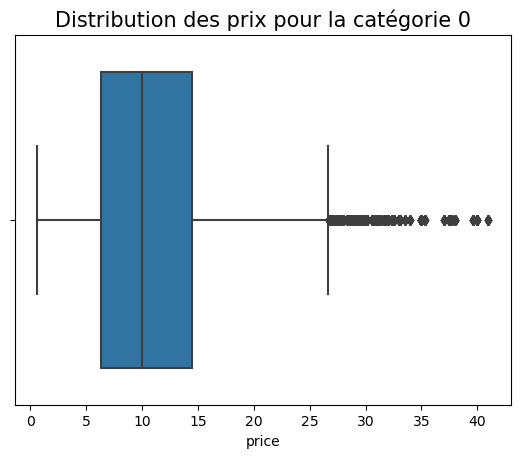

In [56]:
#Utilisation de boxplot pour analyser les prix
liaisonbothcateg0=liaisonboth.loc[liaisonboth.categ==0]
sns.boxplot(liaisonbothcateg0['price'])
plt.title('Distribution des prix pour la catégorie 0',fontsize=15)
#Trier les prix
price0= liaisonbothcateg0['price']
price0 = sorted(price0)
#Calcul du 1 er et 3 eme quartile
q1,q3= np.percentile(price0,[25,75])
print("Le premier quartile est:",q1)
print("Le deuxième quartile est:",q3)
#Calcul de l'écart interquartile
iqr = q3 - q1
print("L'écart interquartile est :",iqr)
#Calcul du min
trait_inferieur = q1 -(1.5 * iqr)
print("La valeur min est:",trait_inferieur)
#Calcul du max
trait_superieur = q3 +(1.5 * iqr)
print("La valeur max est:",trait_superieur)

Le premier quartile est: 15.81
Le deuxième quartile est: 24.98
L'écart interquartile est : 9.17
La valeur min est: 2.0550000000000015
La valeur max est: 38.735


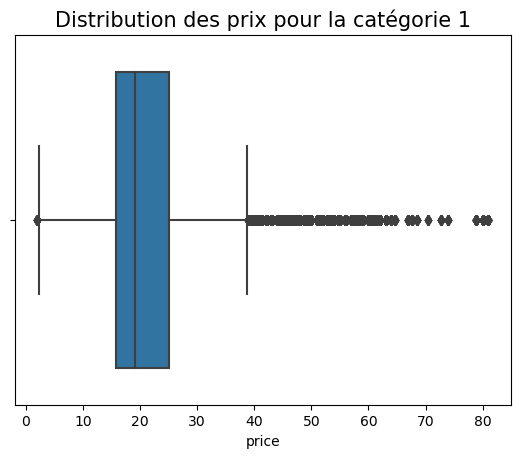

In [57]:
#Utilisation de boxplot pour analyser les prix
liaisonbothcateg1=liaisonboth.loc[liaisonboth.categ==1]
sns.boxplot(liaisonbothcateg1['price'])
plt.title('Distribution des prix pour la catégorie 1',fontsize=15)
#Trier les prix
price1= liaisonbothcateg1['price']
price1 = sorted(price1)
#Calcul du 1 er et 3 eme quartile
q1,q3= np.percentile(price1,[25,75])
print("Le premier quartile est:",q1)
print("Le deuxième quartile est:",q3)
#Calcul de l'écart interquartile
iqr = q3 - q1
print("L'écart interquartile est :",iqr)
#Calcul du min
trait_inferieur = q1 -(1.5 * iqr)
print("La valeur min est:",trait_inferieur)
#Calcul du max
trait_superieur = q3 +(1.5 * iqr)
print("La valeur max est:",trait_superieur)

Le premier quartile est: 53.99
Le deuxième quartile est: 73.72
L'écart interquartile est : 19.729999999999997
La valeur min est: 24.395000000000007
La valeur max est: 103.315


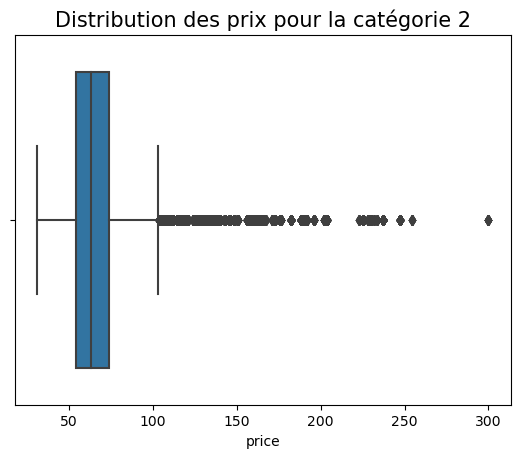

In [58]:
#Utilisation de boxplot pour analyser les prix
liaisonbothcateg2=liaisonboth.loc[liaisonboth.categ==2]
sns.boxplot(liaisonbothcateg2['price'])
plt.title('Distribution des prix pour la catégorie 2',fontsize=15)
#Trier les prix
price2= liaisonbothcateg2['price']
price2 = sorted(price2)
#Calcul du 1 er et 3 eme quartile
q1,q3= np.percentile(price2,[25,75])
print("Le premier quartile est:",q1)
print("Le deuxième quartile est:",q3)
#Calcul de l'écart interquartile
iqr = q3 - q1
print("L'écart interquartile est :",iqr)
#Calcul du min
trait_inferieur = q1 -(1.5 * iqr)
print("La valeur min est:",trait_inferieur)
#Calcul du max
trait_superieur = q3 +(1.5 * iqr)
print("La valeur max est:",trait_superieur)

# Visualistaion du CA par jour

In [59]:
#Création du dataframe liaisonboth_ventes pour regrouper les valeurs de liaison_both en fonction du mois
liaisonbothCA = liaisonboth.groupby(pd.Grouper(key='date', freq='D')).count().reset_index()
#Vente en milliers d'euros
liaisonbothCA['ventes_keuros'] =liaisonbothCA["price"] / 1000
#Séléction des colonnes 'date', 'ventes_keuros'
liaisonbothCA = liaisonbothCA[['date', 'ventes_keuros']]
#Calcul du pourcentage de vente pour chaque mois en fonction du CA total
liaisonbothCA['pourcentage']= 100 * 1000 * (liaisonbothCA.loc[:,"ventes_keuros"] / Total_CA )
print(liaisonbothCA)

          date  ventes_keuros  pourcentage
0   2021-03-01          0.963     0.008123
1   2021-03-02          0.940     0.007929
2   2021-03-03          0.911     0.007684
3   2021-03-04          0.903     0.007616
4   2021-03-05          0.943     0.007954
..         ...            ...          ...
725 2023-02-24          0.894     0.007541
726 2023-02-25          0.905     0.007633
727 2023-02-26          0.890     0.007507
728 2023-02-27          1.110     0.009362
729 2023-02-28          0.961     0.008106

[730 rows x 3 columns]


In [60]:
#Moyenne mobile pour le CA par jour
liaisonbothCA['moyenne_mobile'] = liaisonbothCA.ventes_keuros.rolling(window=10).mean()


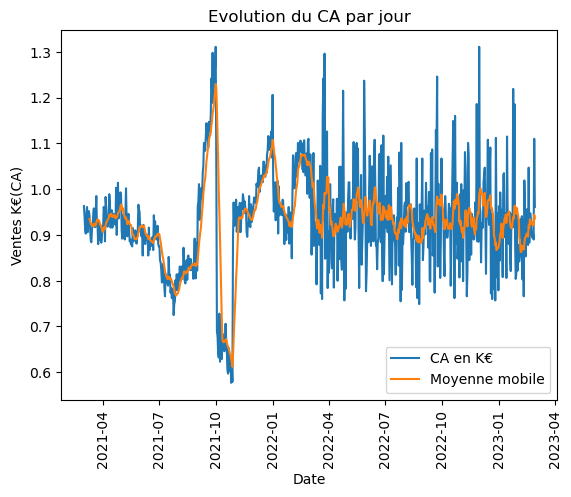

In [61]:
#Graphique sur l'évolution du CA par jour
x1=liaisonbothCA['date']
y1=liaisonbothCA['ventes_keuros']
plt.plot(x1, y1, label = "CA en K€")
x2=liaisonbothCA['date']
y2=liaisonbothCA['moyenne_mobile']
plt.plot(x2, y2, label = "Moyenne mobile")
plt.title('Evolution du CA par jour')
plt.xlabel('Date')
plt.ylabel('Ventes K€(CA)')
plt.xticks(rotation=90)
plt.legend()          
plt.show()

In [62]:
#Tendance chaotique en octobre
transactions_oct = liaisonboth[(liaisonboth["date"] > '2021-10-01') & (liaisonboth["date"] < '2021-10-30')]
transactions_oct

,client_id,sex,birth,id_prod,date,session_id,price,categ,age
13,c_2809,m,1981.0,0_1316,2021-10-26 22:32:35.603105,s_110587,7.20,0.0,41.0
14,c_1987,f,1972.0,0_1316,2021-10-16 08:23:19.617907,s_105529,7.20,0.0,50.0
18,c_3770,m,1956.0,0_1316,2021-10-29 17:38:43.627849,s_111884,7.20,0.0,66.0
39,c_2993,m,1964.0,0_1316,2021-10-20 07:52:27.027746,s_107468,7.20,0.0,58.0
51,c_5835,f,1991.0,0_1316,2021-10-22 23:44:43.991791,s_108696,7.20,0.0,31.0
...,...,...,...,...,...,...,...,...,...
542138,c_1746,m,1994.0,0_2245,2021-10-20 13:11:05.671456,s_107564,9.99,0.0,28.0
542190,c_3953,f,1984.0,0_2245,2021-10-19 00:28:01.920054,s_106841,9.99,0.0,38.0
542219,c_1514,f,1982.0,0_2245,2021-10-04 13:36:19.612226,s_99885,9.99,0.0,40.0
542224,c_6128,m,1986.0,0_2245,2021-10-19 09:32:03.667461,s_107022,9.99,0.0,36.0


In [63]:
transactions_oct.categ=transactions_oct.categ.astype(int)

In [64]:
list(transactions_oct.categ.unique())

[0, 1, 2]

In [65]:
#Création dataframe transaction d octbre pour chaque categ
transac_oct00=transactions_oct.loc[transactions_oct.categ==0].reset_index(drop=True)
transac_oct01=transactions_oct.loc[transactions_oct.categ==1].reset_index(drop=True)
transac_oct02=transactions_oct.loc[transactions_oct.categ==2].reset_index(drop=True)

In [66]:
#CA par jour en octobre pour la ctaeg0
CA_oct0 = transac_oct00.groupby(pd.Grouper(key='date', freq='D'))["price"].sum().reset_index()
CA_oct0

,date,price
0,2021-10-01,6950.50
1,2021-10-02,7141.01
2,2021-10-03,6786.57
3,2021-10-04,6553.58
4,2021-10-05,6357.91
5,2021-10-06,7546.58
6,2021-10-07,6404.01
7,2021-10-08,7069.53
8,2021-10-09,6808.69
9,2021-10-10,6490.98


In [67]:
#CA par jour en octobre pour la ctaeg1
CA_oct1 = transac_oct01.groupby(pd.Grouper(key='date', freq='D'))["price"].sum().reset_index()
CA_oct1

,date,price
0,2021-10-01,7003.79
1,2021-10-02,0.00
2,2021-10-03,0.00
3,2021-10-04,0.00
4,2021-10-05,0.00
5,2021-10-06,0.00
6,2021-10-07,0.00
7,2021-10-08,0.00
8,2021-10-09,0.00
9,2021-10-10,0.00


In [68]:
#CA par jour en octobre pour la ctaeg2
CA_oct02 = transac_oct02.groupby(pd.Grouper(key='date', freq='D'))["price"].sum().reset_index()
CA_oct02

,date,price
0,2021-10-01,3104.05
1,2021-10-02,2041.12
2,2021-10-03,2206.48
3,2021-10-04,2746.08
4,2021-10-05,3032.55
5,2021-10-06,1944.11
6,2021-10-07,1787.07
7,2021-10-08,3137.82
8,2021-10-09,2616.67
9,2021-10-10,2334.67


In [69]:
#On supprime les données d'Octobre qui vont biaiser les analyses suivantes 
liaisonboth = liaisonboth[(liaisonboth["date"] < '2021-10-01') | (liaisonboth["date"] > '2021-10-29')]

# Analyse du nombre de ventes des produits

In [70]:
# Produits qui sont le moins vendus 
flop = liaisonboth[['price','id_prod']].groupby(['id_prod']).count().reset_index().sort_values(by='price')
flop.head(10).rename(columns={'price':'nombre de ventes'})


,id_prod,nombre de ventes
697,0_1633,1
2165,0_886,1
2107,0_833,1
1791,0_549,1
2270,0_980,1
3246,2_81,1
1783,0_541,1
588,0_1533,1
594,0_1539,1
2178,0_898,1


In [71]:
# Produits qui sont le plus vendus 
top = liaisonboth[['price','id_prod']].groupby(['id_prod']).count().reset_index().sort_values(by='price',ascending=False)
top.head(10).rename(columns={'price':'nombre de ventes'})


,id_prod,nombre de ventes
2590,1_369,2246
2643,1_417,2180
2640,1_414,2172
2732,1_498,2121
2652,1_425,2093
2628,1_403,1959
2638,1_412,1946
2631,1_406,1938
2639,1_413,1937
2632,1_407,1930


In [72]:
# CA les plus bas par produit 
CA = liaisonboth[['price','id_prod']].groupby(['id_prod'])['price'].sum().reset_index().sort_values(by='price')
CA.head(10).rename(columns={'price':'CA par produit'})


,id_prod,CA par produit
594,0_1539,0.99
2178,0_898,1.27
313,0_1284,1.38
1896,0_643,1.98
718,0_1653,1.98
664,0_1601,1.99
1783,0_541,1.99
2078,0_807,1.99
801,0_1728,2.27
1543,0_324,2.36


In [73]:
# CA les plus eleves par produit 
CA = liaisonboth[['price','id_prod']].groupby(['id_prod'])['price'].sum().reset_index().sort_values(by='price',ascending=False)
CA.head(10).rename(columns={'price':'CA par produit'})


,id_prod,CA par produit
3095,2_159,92411.67
3069,2_135,67541.21
3044,2_112,62975.24
3033,2_102,59140.00
3151,2_209,55642.05
2618,1_395,54269.28
2590,1_369,53881.54
3042,2_110,52165.50
2640,1_414,51758.76
2606,1_383,51399.27


In [74]:
liaison_CA = pd.merge(liaisonboth, CA, how="outer", on="id_prod", indicator=True)
liaison_CA.rename(columns={'price_x':'price','price_y':'CA par produit'})

,client_id,sex,birth,id_prod,date,session_id,price,categ,age,CA par produit,_merge
0,c_4410,f,1967.0,0_1316,2021-12-29 09:11:18.860592,s_141762,7.20,0.0,55.0,2023.20,both
1,c_4410,f,1967.0,0_1316,2022-03-29 09:11:18.860592,s_186233,7.20,0.0,55.0,2023.20,both
2,c_4410,f,1967.0,0_1316,2022-05-29 09:11:18.860592,s_215758,7.20,0.0,55.0,2023.20,both
3,c_3654,f,1978.0,0_1316,2021-11-26 03:51:34.068872,s_125143,7.20,0.0,44.0,2023.20,both
4,c_3654,f,1978.0,0_1316,2022-08-26 03:51:34.068872,s_258546,7.20,0.0,44.0,2023.20,both
...,...,...,...,...,...,...,...,...,...,...,...
660550,c_4283,f,1976.0,0_2245,2022-08-01 02:46:38.931757,s_246657,9.99,0.0,46.0,2137.86,both
660551,c_4283,f,1976.0,0_2245,2021-09-01 02:46:38.931757,s_83377,9.99,0.0,46.0,2137.86,both
660552,c_6236,f,1976.0,0_2245,2022-02-25 00:08:08.736068,s_170426,9.99,0.0,46.0,2137.86,both
660553,c_4453,m,1981.0,0_2245,2022-02-16 11:35:20.319501,s_166050,9.99,0.0,41.0,2137.86,both


In [75]:
#Correspondance à droite et vice versa
list(liaison_CA._merge.unique())

['both']

# Courbe de Lorenz de la répartition du CA en fonction des prix

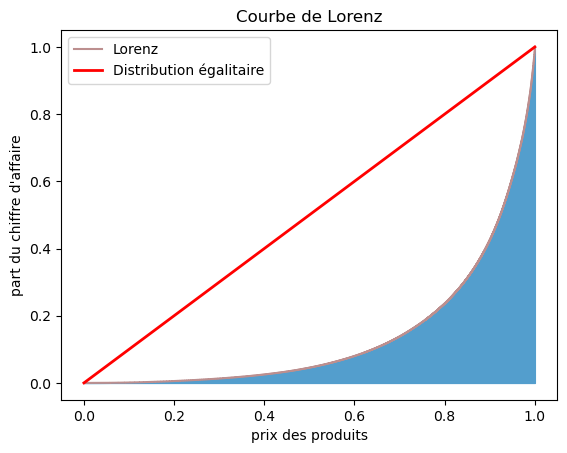

In [76]:
#Tri des individus dans l'ordre croissant des valeurs de la variable, 
dep = liaison_CA[['price_x','price_y']].groupby(['price_y']).sum()['price_x']
n = len(dep)
lorenz_price = np.cumsum(np.sort(dep)) / dep.sum()
lorenz_price = np.append([0],lorenz_price) # La courbe de Lorenz commence à 0

plt.plot(np.linspace(0,1,len(lorenz_price)), lorenz_price, drawstyle='steps-post', color='rosybrown', label='Lorenz')
plt.fill_between(np.linspace(0,1,len(lorenz_price)) ,lorenz_price , color='#539ecd')
plt.plot([0, 1], [0, 1], 'r-', lw=2, label='Distribution égalitaire')
plt.title("Courbe de Lorenz")
plt.xlabel('prix des produits')
plt.ylabel("part du chiffre d'affaire")
plt.legend(loc="best")

plt.show()

In [77]:
#20% des produits les plus chers representent environ 80% du CA

# Courbe de Lorenz de la répartition du CA en fonction de l'age des clients

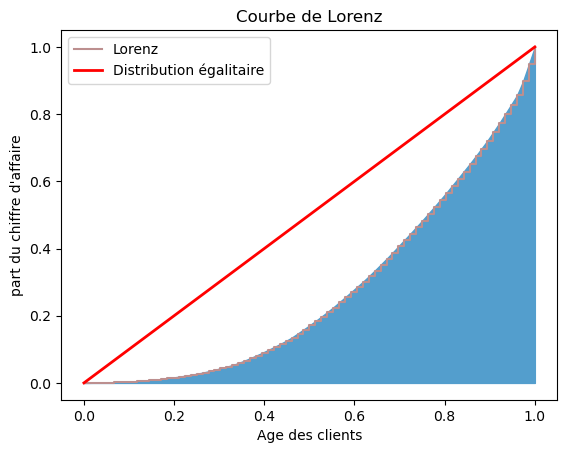

In [78]:
#Tri des individus dans l'ordre croissant des valeurs de la variable, 
dep = liaisonboth[['price','age']].groupby(['age']).sum()['price']
n = len(dep)
lorenz_price = np.cumsum(np.sort(dep)) / dep.sum()
lorenz_price = np.append([0],lorenz_price) # La courbe de Lorenz commence à 0

plt.plot(np.linspace(0,1,len(lorenz_price)), lorenz_price, drawstyle='steps-post', color='rosybrown', label='Lorenz')
plt.fill_between(np.linspace(0,1,len(lorenz_price)) ,lorenz_price , color='#539ecd')
plt.plot([0, 1], [0, 1], 'r-', lw=2, label='Distribution égalitaire')
plt.title("Courbe de Lorenz")
plt.xlabel('Age des clients')
plt.ylabel("part du chiffre d'affaire")
plt.legend(loc="best")

plt.show()

In [79]:
#40% des clients les plus agés représentent plus de 70% du CA

# Analyse des ventes en fonction des clients

In [80]:
# Clients qui ont réalisés le moins d'achats 
moins_achats = liaisonboth[['price','client_id']].groupby(['client_id']).count().reset_index().sort_values(by='price')
moins_achats.head(10).rename(columns={'price':'nombre dachats par clients'})


,client_id,nombre dachats par clients
3247,c_3927,1
5868,c_6292,1
5501,c_5962,1
1556,c_240,1
3855,c_4478,1
1991,c_2793,1
6517,c_6879,1
694,c_1624,1
3810,c_4436,1
4044,c_4648,1


In [81]:
# Clients qui ont réalisés le plus d'achats
plus_achats = liaisonboth[['price','client_id']].groupby(['client_id']).count().reset_index().sort_values(by='price',ascending=False)
plus_achats.head(10).rename(columns={'price':'nombre dachats par clients'})

,client_id,nombre dachats par clients
677,c_1609,24561
6337,c_6714,8951
2724,c_3454,6664
4388,c_4958,5108
2513,c_3263,392
1772,c_2595,387
1268,c_2140,383
1197,c_2077,370
7006,c_7319,368
7120,c_7421,368


In [82]:
#Calcul ca par client
CA_client = pd.DataFrame(liaisonboth.groupby('client_id')['price'].sum().reset_index().sort_values(by='price',ascending=False))
CA_client.rename(columns = {'price':'CA'}, inplace=True)

CA_client.head()

,client_id,CA
677,c_1609,313808.36
4388,c_4958,283629.47
6337,c_6714,150469.55
2724,c_3454,112269.79
2108,c_2899,5214.05


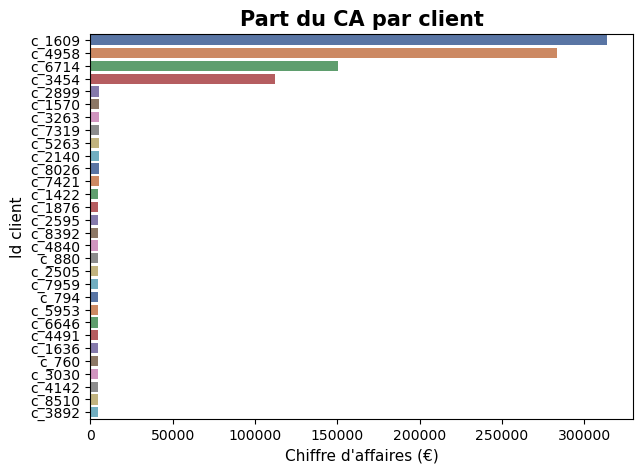

In [83]:
#Diagramme a barre pour mettre en valeur les clients qui se démarquent
clients_top = CA_client.sort_values('CA', ascending=False).head(30)
plt.figure(figsize=(7,5))
sns.barplot(x=clients_top['CA'], y=clients_top['client_id'], palette ='deep')

plt.title("Part du CA par client", fontsize=15, fontweight='bold')
plt.ylabel("Id client", fontsize=11)
plt.xlabel("Chiffre d'affaires (€)", fontsize=11)
plt.show()

In [84]:
# Création d'une variable 'Type' de client (2 modalités : top clients ou autres)
liaisonboth['client_type'] = 'autres'
liaisonboth['client_type'].loc[liaisonboth[liaisonboth['client_id'].isin(plus_achats.head(4)['client_id'])].index] = 'top'

# Création de 2 datafra
top = liaisonboth[liaisonboth['client_type']=='top']
autres = liaisonboth[liaisonboth['client_type']=='autres']
liaisonboth.sample(3)

,client_id,sex,birth,id_prod,date,session_id,price,categ,age,client_type
137845,c_7134,f,1981.0,0_2224,2022-10-25 12:06:08.167740,s_287779,17.19,0.0,41.0,autres
374894,c_5358,m,1979.0,0_1324,2022-04-06 00:12:28.699587,s_189832,3.93,0.0,43.0,autres
520466,c_6572,f,1979.0,0_1981,2021-07-12 20:23:19.125335,s_61410,5.99,0.0,43.0,autres


<function matplotlib.pyplot.show(close=None, block=None)>

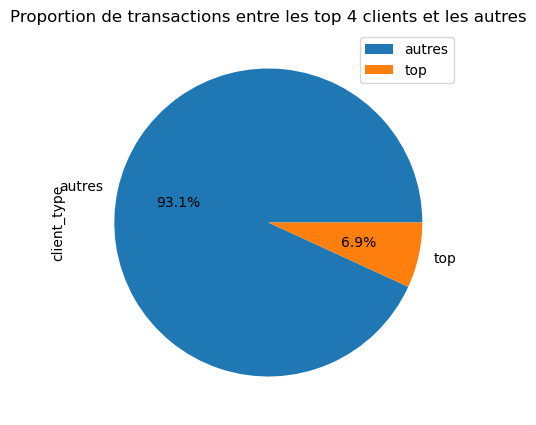

In [85]:
# Proportion des transactions entre top 4 clients et autres
plt.figure(figsize=(5,5))
liaisonboth['client_type'].value_counts(normalize=True).plot(
    kind='pie',
    legend=True,
    autopct='%1.1f%%')
plt.title('Proportion de transactions entre les top 4 clients et les autres')
plt.show


In [86]:
#On peut suggérer que ces 4 clients principaux sont des magasins qui achètent pour revendre 

# Demandes de Julie

# Corrélation entre le genre d’un client et les catégories des livres achetés

In [87]:
#Test de chi2 pour savoir si il y'a un lien entre le genre d'un client et les catégories de livres achetés

In [88]:
# Création de categ_par_genre en supprimant les colonnes inutiles
categ_par_genre = liaisonboth.drop(columns=["id_prod","date","session_id","birth","age","price"])
# Créé une table de categ_par_genre avec crosstab pour calculer la fréquence
categ_par_genre2 = pd.crosstab(categ_par_genre["categ"], categ_par_genre["sex"],margins=False)
categ_par_genre2

sex,f,m
categ,,
0.0,197933,200670
1.0,114580,111929
2.0,16794,18649


In [89]:
# Test du Chi2 pour voir si il y a un lien entre la categorie et le sexe
#H0 indépendantes et H1 correlation
# Si la pValue est inférieur à notre taux de risque alors on rejette l'hypothèse H0 
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(categ_par_genre2)
print("Satistique chi2 : ",st_chi2)
print("P value :",st_p)
# Compare la Pvalue au seuil de 5%
print("st_p>=0.05 :",st_p>=0.05)

Satistique chi2 :  141.20402246704748
P value : 2.177389428371405e-31
st_p>=0.05 : False


In [90]:
#Pvaleur <5% on rejette H0 quand elle dépasse 5% on l'accepte

In [91]:
if st_p > .05:
    print('H0: Les 2 variables sont indépendantes')
else:
    print('H1: Les 2 variables sont corrélées')

H1: Les 2 variables sont corrélées


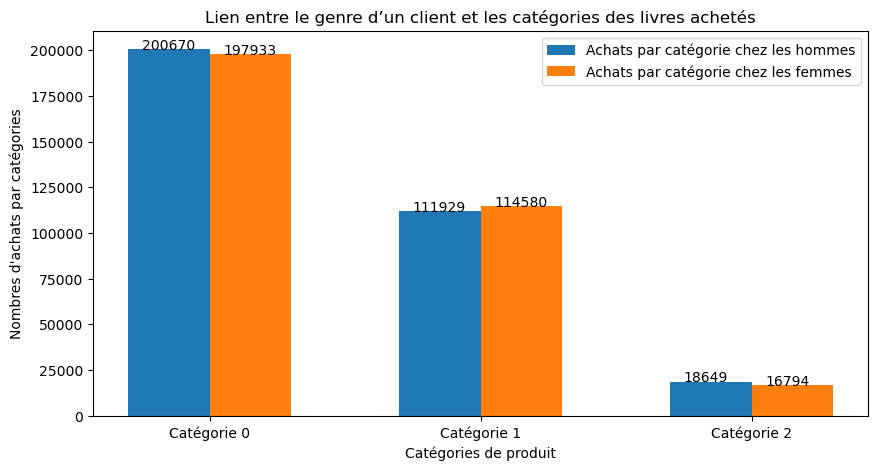

In [92]:
# Nombre de barres pour le graph
N=3
# Données pour les barres
homme = categ_par_genre2.m
femme = categ_par_genre2.f
# Position des barres sur l'axe des abscisses
ind = np.arange(N)
# Règle la taille de la figure
plt.figure(figsize=(10,5))
# Règle la largeur des barres
width = 0.3
# Créé les barres
h=plt.bar(ind, homme , width, label='Achats par catégorie chez les hommes')
f=plt.bar(ind + width, femme, width, label='Achats par catégorie chez les femmes')

# Affiche le nom des axes
plt.xlabel('Catégories de produit')
plt.ylabel("Nombres d'achats par catégories")
#Affiche le titre
plt.title('Lien entre le genre d’un client et les catégories des livres achetés')
# Affiche les noms des ticks de l'axe des abscisses
plt.xticks(ind + width / 2, ('Catégorie 0', 'Catégorie 1', 'Catégorie 2'))
# Affiche la légende
plt.legend(loc='best')

for i in range(3):
  plt.text(-0.1+i, homme.iloc[0+i], str(homme.iloc[0+i]))
  plt.text(0.2+i, femme.iloc[0+i], str(femme.iloc[0+i]))
#Faire des tests entre variables
plt.show()

In [93]:
#Plus de femmes achetent catégroie 1 que 0 et 2 

# Corrélation entre l'age des clients et le montant total des achats

In [94]:
tachat_perage = liaisonboth.drop(columns=["id_prod","date","session_id", "sex", "categ", "birth"])
# Groupby client_id et age pour avoir le total des achat par client et leur age
tachat_perage = tachat_perage.groupby("age")["price"].sum().reset_index()
#tachat_perage = tachat_perage.rename(columns={"price":"total_achat"})
tachat_perage

,age,price
0,18.0,593513.60
1,19.0,173724.62
2,20.0,179565.38
3,21.0,175152.49
4,22.0,161520.78
5,23.0,478989.71
6,24.0,198060.99
7,25.0,179040.95
8,26.0,251258.86
9,27.0,222365.87


In [95]:
#Hypothèse H0 : Les données ne sont pas corrélées et hypothèse H1 les valeurs sont corrélées.
#Coefficient de Spearman
st.spearmanr(tachat_perage.age,tachat_perage.price)
# indice de correlation a 0 signifie qu il n y a pas de correlation si il est de 1 ou -1 correspond a une relation 
#monotone , si la correlation >0 , x et y augmentent en meme temps si correlation<0 x augmente 

SpearmanrResult(correlation=-0.857634996582365, pvalue=4.549641585441243e-23)

# Corrélation entre l’âge des clients et la fréquence d’achat

In [96]:
# Création d'une dataframe pour calculer le nombre d'achat et le montant total des achats par âge
table2 = liaisonboth.groupby('age')['price'].agg(['count', 'sum']).sort_values('sum').reset_index()
table2

,age,count,sum
0,91.0,164,2691.19
1,93.0,199,3197.08
2,92.0,225,3993.88
3,87.0,261,4668.89
4,90.0,298,4885.59
5,89.0,320,5181.92
6,88.0,542,9041.55
7,86.0,749,12630.05
8,84.0,820,13769.17
9,85.0,924,15901.25


In [97]:
# Test de corrélation Pearson avec variables  age et fréquence d'achat
#Hypothèse H0 : Les données ne sont pas corrélées et hypothèse H1 les valeurs sont corrélées.
pearson_coeff, pvalue = stats.pearsonr(table2['age'],table2['count'])
print('pearson_coeff={:.3f},pvalue={:.8f}'.format(pearson_coeff, pvalue))

pearson_coeff=-0.535,pvalue=0.00000063


In [98]:
# Il existe potentiellement une corrélation mais très faible

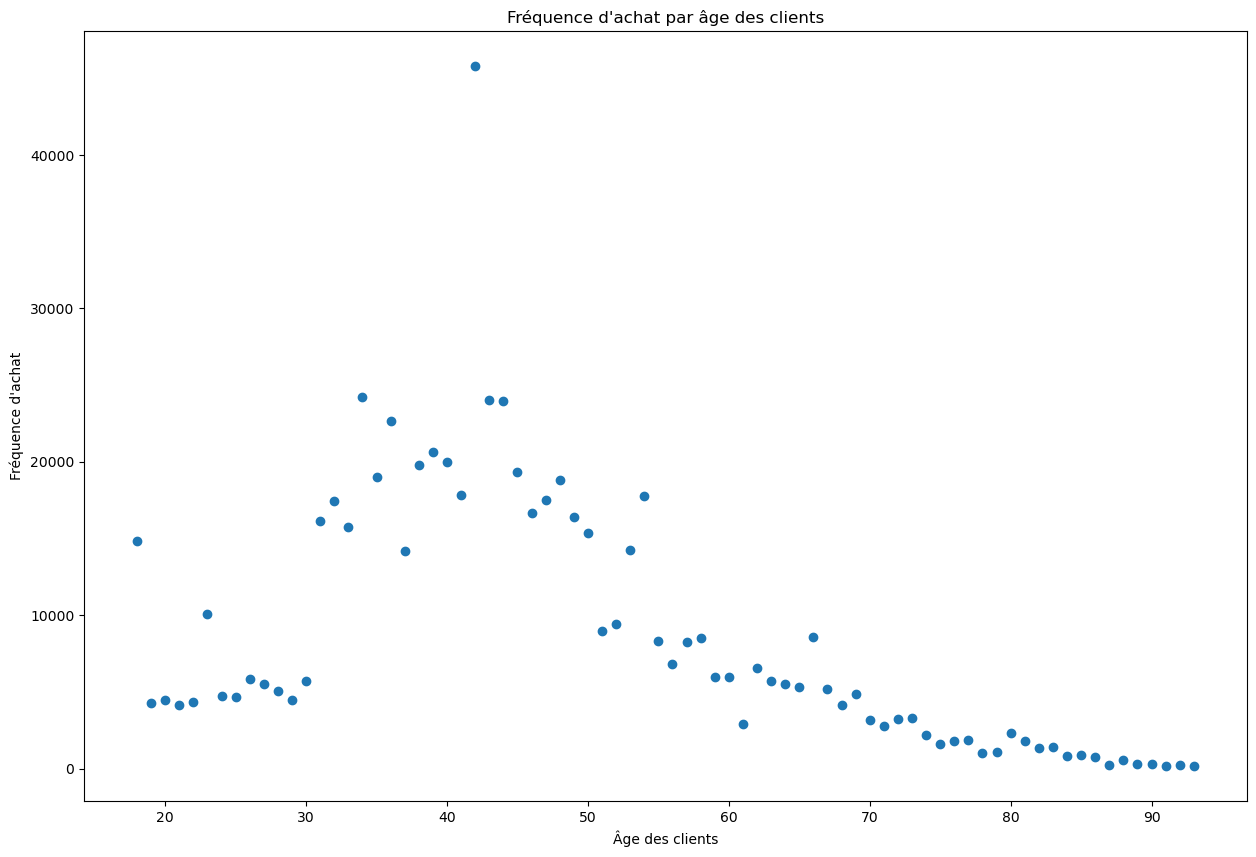

In [99]:
# Nuage de point Fréquence d'achat par âge des clients 
plt.figure(figsize=(15, 10))
plt.scatter(table2['age'],table2['count'])
plt.ylabel("Fréquence d'achat")
plt.xlabel('Âge des clients')
plt.title("Fréquence d'achat par âge des clients")
plt.show()

# Corrélation entre l’âge des clients et la taille du panier moyen

In [100]:
#Calcul du panier moyen
session=liaisonboth.groupby(by="session_id")
#Nombre de produits par session
session_prod=session['id_prod'].count()
session_prod

session_id
s_1        1
s_10       1
s_100      2
s_1000     4
s_10000    3
          ..
s_9995     2
s_9996     8
s_9997     1
s_9998     1
s_9999     3
Name: id_prod, Length: 332175, dtype: int64

In [101]:
taille_panier = liaisonboth.groupby(['age','session_id'])["id_prod"].count().reset_index()
panier_moyen = taille_panier.groupby(['age'])["id_prod"].mean().reset_index()
panier_moyen

,age,id_prod
0,18.0,1.770361
1,19.0,1.705246
2,20.0,1.768139
3,21.0,1.754202
4,22.0,1.823356
5,23.0,1.537286
6,24.0,1.728305
7,25.0,1.877764
8,26.0,1.695866
9,27.0,1.788641


In [102]:
# Test de corrélation Pearson entre les variables age et Taille du panier moyen
#Hypothèse H0 : Les données ne sont pas corrélées et hypothèse H1 les valeurs sont corrélées.
pearson_coeff, pvalue = stats.pearsonr(panier_moyen['age'],panier_moyen['id_prod'])
print('pearson_coeff={:.3f},pvalue={:.7f}'.format(pearson_coeff, pvalue))

pearson_coeff=-0.572,pvalue=0.0000001


In [103]:
# Coeffcient = -0.572, plustôt proche de -1, potentiellement une corrélation négative 
# Les variables age et panier moyen sont  corrélées

# Corrélation entre l’âge des clients et la catégorie de livres achetés

In [104]:
#Le test à réaliser comprend une variable quantitative et une variable qualitative à 3 modalités (categ 0,1,2)
#On va vérifier si les données suivent une loi normale 
#Si elles suivent bien une loi normale , on réalisera un test d'Anova sinon un test de Kruskall-Wallis

In [105]:
# Test de de Kolmogorov-Sirnov pour vérifier si les données suivent une loi normale
#H0 : les résidus suivent une loi normale et H1 : les résidus ne suivent pas une loi normale

In [106]:
#categ 0
st.ks_2samp(liaisonboth[liaisonboth['categ']==0]['age'],list(np.random.normal(np.mean(liaisonboth[liaisonboth['categ']==0]['age']), np.std(liaisonboth[liaisonboth['categ']==0]['age']), 1000)))

KstestResult(statistic=0.10713209383772826, pvalue=2.0299708307263147e-10)

In [107]:
#categ 1
st.ks_2samp(liaisonboth[liaisonboth['categ']==1]['age'],list(np.random.normal(np.mean(liaisonboth[liaisonboth['categ']==1]['age']), np.std(liaisonboth[liaisonboth['categ']==1]['age']), 1000)))

KstestResult(statistic=0.04, pvalue=0.08036180690140937)

In [108]:
#categ 2
st.ks_2samp(liaisonboth[liaisonboth['categ']==2]['age'],list(np.random.normal(np.mean(liaisonboth[liaisonboth['categ']==2]['age']), np.std(liaisonboth[liaisonboth['categ']==2]['age']), 1000)))

KstestResult(statistic=0.2497988319273199, pvalue=5.584288863747341e-54)

In [113]:
#Pvalue <0,05 pour categ 0  et 2 donc  elles ne suivent pas une loie normale on va réaliser un test de kruskall wallis

In [119]:
#Test d'égalité de variances avec un test de Bartlett avec 5% de niveau de test avec comme hypothèses :
#H0 : Les variances de chaque catégorie sont égales;
#H1 : Les variances sont différentes entre les catégories.
st.bartlett(liaisonboth[liaisonboth['categ']==0]['age'],liaisonboth[liaisonboth['categ']==1]['age'],liaisonboth[liaisonboth['categ']==2]['age'])

BartlettResult(statistic=35990.731719273084, pvalue=0.0)

In [ ]:
#La p-value étant <0,05, on rejette l'hypothèse nulle et on peut conclure qu'il n'y a pas d'égalité de variances ici

In [114]:
#Test de Kruskall-Wallis
#H0 : même rang moyen pour chaque catégorie et H1 : différents rangs moyens pour au moins 2 catégories
st.kruskal(liaisonboth[liaisonboth['categ']==0]['age'],liaisonboth[liaisonboth['categ']==1]['age'],liaisonboth[liaisonboth['categ']==2]['age'])

KruskalResult(statistic=77149.73615669532, pvalue=0.0)

In [115]:
#pvalue<0,05 au moins l'une des catégories possède une distribution différente des autres
#Ainsi, la catégorie des livres achetés dépend de l'âge des clients pour au moins deux catégories.

Text(0, 0.5, 'Âge')

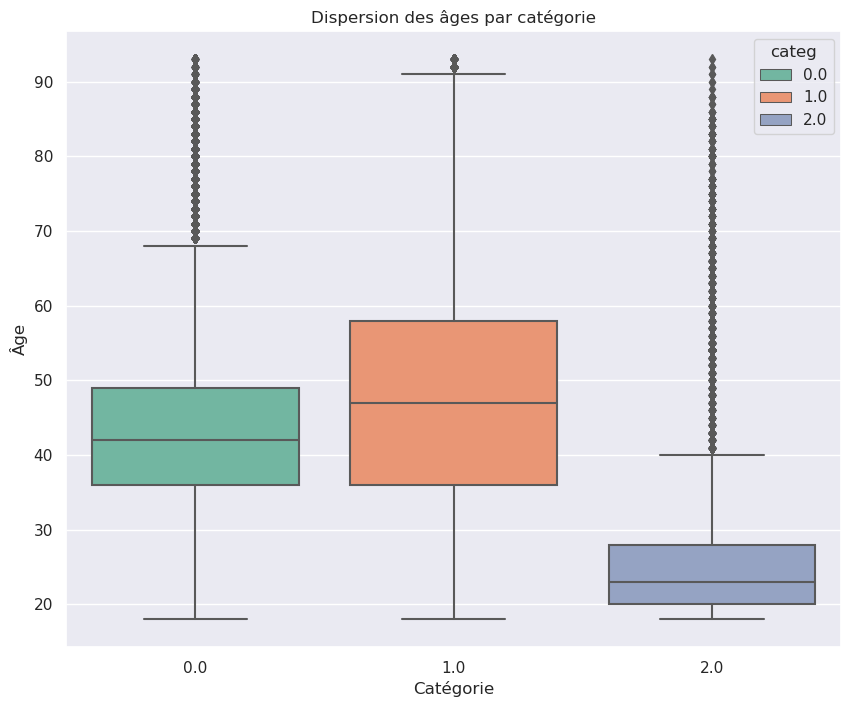

In [112]:
# Boxplot Dispersion des âges des clients par catégorie

sns.set(rc={'figure.figsize': (10, 8)})
ax = sns.boxplot(y="age", x="categ", data=liaisonboth,
                 hue='categ', dodge=False, palette='Set2')
ax.set_title('Dispersion des âges par catégorie')
ax.set_xlabel('Catégorie')
ax.set_ylabel('Âge')